# ML Model Selection and Evaluation

After completing all the preprocessing steps, we are ready to implement some interesting machine learning models and evaluate their performance.

We will apply two types of supervised learning techniques: classification and regression, using the preprocessed dataset.

1. Classification Task:

- The goal is to predict whether a person has a medical condition or not.
- For this task, we will use the standardized dataset obtained from the preprocessing steps. Standardization ensures that all features have a mean of zero and a standard deviation of one, making it suitable for classification algorithms.

2. Regression Task:

- The aim here is to predict the Work-Life Balance score, where a higher value indicates a poor work-life balance, and a lower value indicates a better balance.
- For this purpose, we will use the normalized dataset from the preprocessing steps. Normalization scales all features to a range (e.g., 0 to 1), which is particularly useful for regression models that rely on distances or gradients.


By tailoring the datasets to their respective tasks (standardized for classification and normalized for regression), we ensure optimal performance for the chosen models.

## Part 1 - Loading the preprocessed data to train the models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
standardized_data= pd.read_csv(r"D:\Aadhitya\Downloads\standarsized_preprocessed_data.csv")
standardized_data = standardized_data.sample(n=500, random_state=42)

In [3]:
standardized_data['Mental_Health_Condition'].value_counts()

1    261
0    239
Name: Mental_Health_Condition, dtype: int64

In [4]:
normalized_data = pd.read_csv(r"D:\Aadhitya\Downloads\normalized_preprocessed_data.csv")
normalized_data = normalized_data.sample(n=500, random_state=42)

In [5]:
normalized_data.head()

,User_ID,Age,Gender,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,...,Occupation_Sales,Country_Canada,Country_Germany,Country_India,Country_Other,Country_UK,Country_USA,Work_Life_Balance,Stress_Sleep_Ratio,Mental_Health_Risk_Factor
521,522,0.659574,1,1,3,1,0,0.083333,0.80,0.6,...,0,0,0,1,0,0,0,0.347808,0.000000,0.714286
737,738,0.212766,0,0,3,1,0,0.933333,0.82,0.5,...,0,0,1,0,0,0,0,0.398478,0.000000,0.571429
740,741,0.021277,0,0,3,0,0,0.750000,0.20,0.1,...,0,0,0,0,0,1,0,0.560357,0.000000,0.428571
660,661,0.170213,1,0,0,0,0,0.083333,0.56,0.0,...,0,0,1,0,0,0,0,0.899913,0.000000,0.000000
411,412,0.787234,2,0,3,0,1,0.650000,0.68,1.0,...,0,0,0,0,1,0,0,0.190589,0.273224,0.571429


## Part 2 - Classification

### Part 2.1 - Model Training

As mentioned earlier, I will apply classification algorithms using 'Mental_Health_Condition' as the target variable. The objective is to determine whether a mental health condition is present.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

In [7]:
target_variable = 'Mental_Health_Condition'
X = standardized_data.drop(columns=[target_variable, 'User_ID'])
y = standardized_data[target_variable]


In [8]:
X

,Age,Gender,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Occupation_Engineering,Occupation_Finance,...,Occupation_Sales,Country_Canada,Country_Germany,Country_India,Country_Other,Country_UK,Country_USA,Work_Life_Balance,Stress_Sleep_Ratio,Mental_Health_Risk_Factor
521,0.508886,1,3,1,0,-1.515233,1.046071,0.281144,1,0,...,0,0,0,1,0,0,0,-0.067335,-1.120586,0.637536
737,-0.994576,0,3,1,0,1.461994,1.114090,-0.043503,0,0,...,0,0,1,0,0,0,0,0.163421,-1.120586,0.003172
740,-1.638917,0,3,0,0,0.819847,-0.994512,-1.342092,0,1,...,0,0,0,0,0,1,0,0.900636,-1.120586,-0.631193
660,-1.137763,1,0,0,0,-1.515233,0.229838,-1.666739,0,0,...,0,0,1,0,0,0,0,2.447012,-1.120586,-2.534287
411,0.938447,2,3,0,1,0.469585,0.637954,1.579733,0,1,...,0,0,0,0,1,0,0,-0.783332,-0.136482,0.003172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.437293,1,3,0,1,0.002569,1.386168,0.605792,0,1,...,0,0,0,1,0,0,0,-0.154901,-0.029143,0.003172
444,-0.421829,1,1,1,2,-1.281725,-0.178279,-1.017444,1,0,...,0,0,0,1,0,0,0,0.697347,1.870882,0.637536
416,-0.922983,1,3,1,0,1.637125,-0.518376,-1.342092,0,0,...,0,0,0,1,0,0,0,1.131393,-1.120586,0.003172
870,-0.994576,1,1,0,0,-0.581201,-0.586396,-1.666739,0,0,...,0,0,0,0,0,0,1,2.106620,-1.120586,-1.265558


Train Test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Summary about selected models(Before Training): 

**Logistic Regression**: This is a **highly interpretable model**, allowing us to gain deeper insights into the relationships between independent variables like sleep, stress, and work-life balance, and the dependent variable. It works well with standardized data but **may struggle with non-linear relationships and multicollinearity**.

**Decision Trees and Random Forests**: These models can** effectively handle non-linear relationships** and help **mitigate overfitting**. They also provide feature importance, highlighting the most influential variables. However, decision trees **can overfit the data**, and random forests, while better at generalization, are **less interpretable compared to logistic regression**. This creates a trade-off between understanding the model and achieving better performance.

**SVM**: Suitable for datasets with **high dimensionality** but requires careful selection of kernels and proper scaling of input features to perform optimally.

**Neural Networks**: **Very effective at capturing complex data relationships** such as Age, Stress-Sleep Ratio, and Work-Life Balance. However, **interpreting the results is more challenging** due to the model's complexity.


In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=750, random_state=42)
}

In [11]:
results = {}
confusion_matrices = {}

In [12]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating metrics for model evaluationsS
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='binary')
    recall = recall_score(y_test, y_test_pred, average='binary')
    f1 = f1_score(y_test, y_test_pred, average='binary')
    
    # Storing results
    results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    confusion_matrices[name] = confusion_matrix(y_test, y_test_pred)

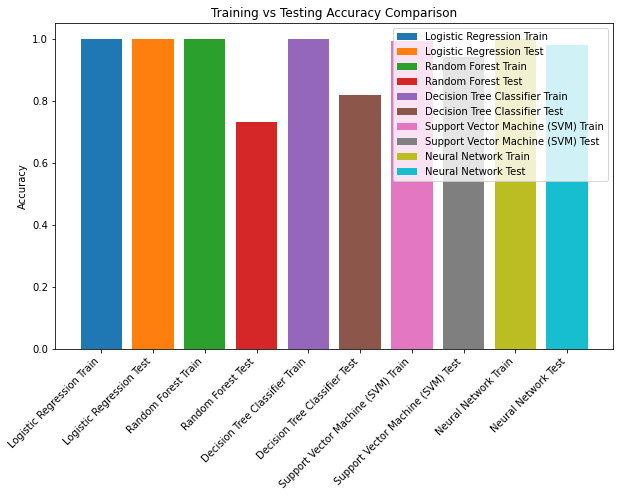

In [13]:
plt.figure(figsize=(10, 6))
for name, metrics in results.items():
    plt.bar(name + " Train", metrics["Train Accuracy"], label=name + " Train")
    plt.bar(name + " Test", metrics["Test Accuracy"], label=name + " Test")
plt.title("Training vs Testing Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [14]:
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

In [15]:
results_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0000,1.00,1.000000,1.000000,1.000000
1,Random Forest,1.0000,0.73,0.672414,0.829787,0.742857
2,Decision Tree Classifier,1.0000,0.82,0.795918,0.829787,0.812500
3,Support Vector Machine (SVM),0.9925,0.94,0.918367,0.957447,0.937500
4,Neural Network,1.0000,0.98,0.978723,0.978723,0.978723


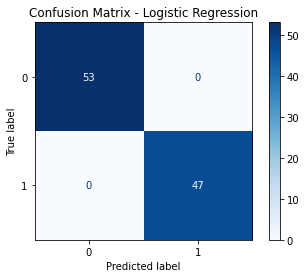

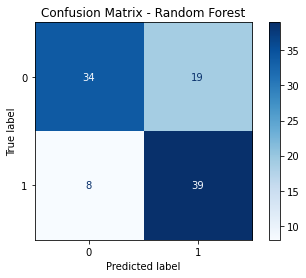

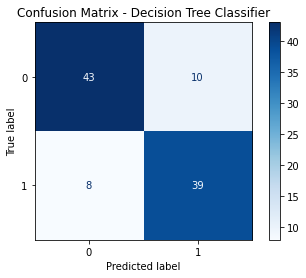

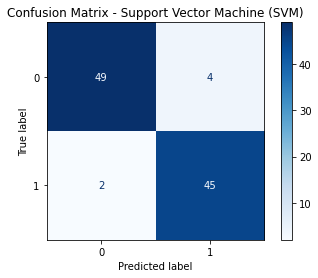

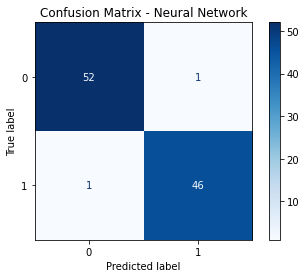

In [16]:
for name, cm in confusion_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

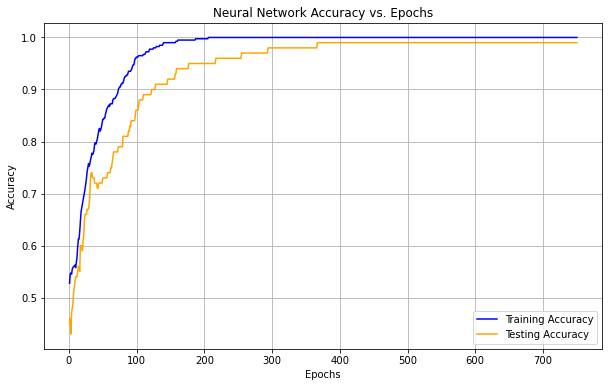

In [17]:
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=750, random_state=42)
train_accuracies = []
test_accuracies = []
epochs = 750

# Train the model for a fixed number of epochs and record accuracy
for epoch in range(epochs):
    nn_model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    # Record training accuracy
    train_predictions = nn_model.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, train_predictions))
    # Record testing accuracy
    test_predictions = nn_model.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, test_predictions))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label="Training Accuracy", color='blue')
plt.plot(range(1, epochs + 1), test_accuracies, label="Testing Accuracy", color='orange')
plt.title("Neural Network Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Summary after initial model training and result visualization:

- **Logistic Regression** achieves perfect scores with a Train Accuracy and Test Accuracy of 1.0, supported by a Precision, Recall, and F1 Score of 1.0, making it the most generalizable model without overfitting.

- **Random Forest** has perfect Train Accuracy but underperforms in Test Accuracy (0.73), with lower Precision (0.67) and F1 Score** (0.74), indicating overfitting.

- **Decision Tree Classifier** exhibits similar overfitting tendencies with a Train Accuracy of 1.0 and a Test Accuracy of 0.82. Its Precision (0.80) and F1 Score (0.81) show slight improvement over Random Forest.

- **Support Vector Machine (SVM)** balances performance with a Train Accuracy of 0.99 and Test Accuracy of 0.94. It achieves strong metrics, including an F1 Score of 0.94.

- **Neural Network** shows slight overfitting with a Train Accuracy of 1.0 and Test Accuracy of 0.98, maintaining a high F1 Score of 0.98. The training convergence plot confirms its high learning efficiency over epochs.




## Part 2.2 Hyperparameter tuning and Model Evaluation 

**Pointers after initial model training and steps for parameter tuning**:
- Several models experienced overfitting issues, so we will apply regularization techniques to address this problem.

- For Logistic Regression, we use L2 regularization (Ridge regularization) by setting the penalty parameter to help reduce overfitting.

- For Decision Trees and Random Forests, we control overfitting by limiting the height and depth of the trees.

- We set the regularization parameter to 0.001 for models where this parameter is applicable. Since this value is the inverse of regularization strength, a smaller value ensures stronger regularization.

- We also include a regularization parameter in the Neural Network to prevent overfitting and improve its generalization ability.

In [18]:
models = {"Logistic Regression": LogisticRegression(penalty='l2', max_iter=500, random_state=42, C=0.1), # Add regularization (C=0.1)
        "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42),  # Limit depth and splits
        "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), # Limit depth and splits
        "Support Vector Machine (SVM)": SVC(C=1.0, kernel='rbf', probability=True, random_state=42),  # Default regularization (C=1.0)
        "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=750, alpha=0.001, random_state=42) # Add regularization (alpha) 
}

In [19]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
results_df = pd.DataFrame(results)

results_df


Training Logistic Regression...
Training Random Forest...
Training Decision Tree Classifier...
Training Support Vector Machine (SVM)...
Training Neural Network...


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9750,0.97,0.971800,0.97,0.970027
1,Random Forest,0.9875,0.72,0.757978,0.72,0.713864
2,Decision Tree Classifier,0.7975,0.74,0.745347,0.74,0.740000
3,Support Vector Machine (SVM),0.9925,0.94,0.940848,0.94,0.940048
4,Neural Network,1.0000,0.98,0.980000,0.98,0.980000


### Summary after hyper parameter tuning:
- The **Neural Network** demonstrates the **best performance** with nearly perfect scores (F1: 0.98, Precision: 0.98, Recall: 0.98) but lacks interpretability. 

- **Logistic Regression** offers **high interpretability** with strong and balanced metrics (F1: 0.97, Precision: 0.97, Recall: 0.97) and **minimal overfitting**. 

- **SVM** achieves a **strong balance between performance and generalization** (F1: 0.94, Precision: 0.94, Recall: 0.94), making it a reliable choice for **high-dimensional data**. 

- **Random Forest** suffers from **significant overfitting** (F1: 0.71, Precision: 0.75, Recall: 0.72), even after hyperparameter tuning. 

- **Decision Tree serves** as a simple baseline model with moderate performance (F1: 0.74, Precision: 0.74, Recall: 0.74) but is outperformed by other models.

In [20]:
from sklearn.model_selection import cross_val_score
k = 5
cv_results = []

# Perform k-fold cross-validation for each model
for model_name, model in models.items():
    print(f"Performing {k}-fold cross-validation for {model_name}...")
    accuracies = cross_val_score(model, X, y, cv=k, scoring='accuracy')
    precisions = cross_val_score(model, X, y, cv=k, scoring='precision_weighted', error_score='raise')
    recalls = cross_val_score(model, X, y, cv=k, scoring='recall_weighted', error_score='raise')
    f1_scores = cross_val_score(model, X, y, cv=k, scoring='f1_weighted', error_score='raise')
    cv_results.append({
        "Model": model_name,
        "Mean Accuracy": np.mean(accuracies),
        "Mean Precision": np.mean(precisions),
        "Mean Recall": np.mean(recalls),
        "Mean F1 Score": np.mean(f1_scores),
        "Std Accuracy": np.std(accuracies) 
    })
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

Performing 5-fold cross-validation for Logistic Regression...
Performing 5-fold cross-validation for Random Forest...
Performing 5-fold cross-validation for Decision Tree Classifier...
Performing 5-fold cross-validation for Support Vector Machine (SVM)...
Performing 5-fold cross-validation for Neural Network...


,Model,Mean Accuracy,Mean Precision,Mean Recall,Mean F1 Score,Std Accuracy
0,Logistic Regression,0.970,0.971029,0.970,0.970002,0.020976
1,Random Forest,0.664,0.667561,0.664,0.660492,0.054626
2,Decision Tree Classifier,0.732,0.739437,0.732,0.728986,0.066151
3,Support Vector Machine (SVM),0.956,0.957583,0.956,0.955910,0.022450
4,Neural Network,0.984,0.984670,0.984,0.983981,0.010198


### Final pointers after cross-validation
- For best accuracy and generalization, choose the Neural Network.
- For interpretable results with strong generalization, use Logistic Regression.
- Avoid relying on Random Forest and Decision Tree due to suboptimal and inconsistent performance.

Now that we have completed hyperparameter tuning, let's analyze and interpret the results obtained.

### Part 2.3 Logistic Regression Interpretation
Now I am using the logistic regression model to find the underlying relations and know about the essence of the dataset.

In [21]:
coefficients = models['Logistic Regression'].coef_[0]
odds_ratios = np.exp(coefficients)

# Display coefficients and odds ratios
for feature, coef, odds in zip(X.columns, coefficients, odds_ratios):
    print(f"Feature: {feature}, Coefficient: {coef:.3f}, Odds Ratio: {odds:.3f}")

Feature: Age, Coefficient: 0.008, Odds Ratio: 1.008
Feature: Gender, Coefficient: -0.031, Odds Ratio: 0.970
Feature: Severity, Coefficient: -1.257, Odds Ratio: 0.285
Feature: Consultation_History, Coefficient: -0.962, Odds Ratio: 0.382
Feature: Stress_Level, Coefficient: -0.653, Odds Ratio: 0.520
Feature: Sleep_Hours, Coefficient: -0.171, Odds Ratio: 0.843
Feature: Work_Hours, Coefficient: 0.048, Odds Ratio: 1.049
Feature: Physical_Activity_Hours, Coefficient: 0.054, Odds Ratio: 1.055
Feature: Occupation_Engineering, Coefficient: 0.112, Odds Ratio: 1.119
Feature: Occupation_Finance, Coefficient: 0.002, Odds Ratio: 1.002
Feature: Occupation_Healthcare, Coefficient: 0.163, Odds Ratio: 1.177
Feature: Occupation_IT, Coefficient: 0.108, Odds Ratio: 1.114
Feature: Occupation_Other, Coefficient: -0.008, Odds Ratio: 0.992
Feature: Occupation_Sales, Coefficient: -0.004, Odds Ratio: 0.996
Feature: Country_Canada, Coefficient: 0.254, Odds Ratio: 1.290
Feature: Country_Germany, Coefficient: -0.057

### Interpretation of Logistic model:
- **Age** - For every additional year of age, the odds of having a mental health condition increase slightly by 0.8%. This suggests age has a minimal but positive association with the target variable. 

- **Gender** - Being of a different gender (likely coded as male/female) decreases the odds of having a mental health condition by 3%. The impact is small.

- **Severity** - Higher severity decreases the odds of a mental health condition by 71.5% (1 - 0.285). This could reflect a complex relationship where severity may represent conditions outside the scope of mental health.

- **Consultation History** - A history of consultations reduces the odds of a mental health condition by 61.8% (1 - 0.382), possibly due to prior interventions.

- **Stress Level** - Higher stress levels reduce the odds of having a mental health condition by 48%, which could indicate that stress is being managed or coded differently in this dataset.

- **Sleep Hours** - More sleep hours reduce the odds of a mental health condition by 15.7% (1 - 0.843), aligning with the importance of sleep in mental health.

- **Work Hours** - Longer work hours increase the odds of a mental health condition by 4.9%, indicating a minor positive relationship.

- **Physical Activity Hours** -  Increased physical activity hours raise the odds of a mental health condition by 5.5%. This may suggest an indirect relationship where physical activity is a coping mechanism.

- **Occupation** - Engineering, healthcare, and IT occupations slightly increase the odds of a mental health condition, with healthcare having the largest impact (17.7% increase).Occupations categorized as "Other" or "Sales" slightly reduce the odds but with negligible effects.

- **Country** - Canada shows the highest increase in odds (29%), suggesting location influences mental health risk.Germany and other countries slightly reduce the odds of mental health conditions.

- **Work-Life Balance** - Better work-life balance increases the odds of a mental health condition by 1.9%, which might reflect complex interactions between workload and stress.

- **Stress-Sleep Ratio** - A higher stress-to-sleep ratio reduces the odds of mental health conditions by 43.5%. This likely reflects a balancing effect where higher stress accompanied by adequate sleep mitigates risk.

- **Mental Health Risk Factor** - Mental health risk factors increase the odds of having a mental health condition nearly tenfold, making it the most significant predictor in this model.

## Part 3 Regression
Next, I will perform regression with Work-Life Balance as the target variable. A higher value indicates poor work-life balance, while a lower value indicates better work-life balance. Since these models are distance-based, I will use normalized dataset values, as normalization ensures better performance by standardizing feature scales.

### Part 3.1 Model Training 

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, roc_curve, auc,r2_score
from sklearn.model_selection import train_test_split

In [23]:
target_variable = 'Work_Life_Balance'
X_regression = normalized_data.drop(columns=[target_variable, 'User_ID', 'Mental_Health_Condition'], errors='ignore')
y_regression = normalized_data[target_variable]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

In [26]:
regression_results = {}

### Summary Before Model Training:

- **Linear Regression**: Simple, interpretable, effective for linear relationships. Struggles with non-linearity, sensitive to outliers.

- **Ridge Regression**: Reduces overfitting via L2 regularization, handles multicollinearity. Does not perform feature selection, less effective for sparse features.

- **Lasso Regression**: Performs feature selection via L1 regularization, suitable for sparse datasets. Can overly shrink coefficients, struggles when all features are important.

- **Neural Network**: Captures complex non-linear relationships, flexible. Requires more data, less interpretable, prone to overfitting without proper tuning.

In [27]:
regression_results = {}

for name, model in models.items():

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculating metrics for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    regression_results[name] = {
        "Train MSE": train_mse,
        "Train RMSE": train_rmse,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test RMSE": test_rmse,
        "Test R2": test_r2
    }


In [28]:
regression_results_df = pd.DataFrame(regression_results).T
regression_results_df

,Train MSE,Train RMSE,Train R2,Test MSE,Test RMSE,Test R2
Linear Regression,0.005013,0.070803,0.886863,0.004648,0.068177,0.903735
Ridge Regression,0.005051,0.071073,0.885998,0.004522,0.067244,0.906352
Lasso Regression,0.007907,0.088920,0.821557,0.006598,0.081228,0.863354
Neural Network,0.005349,0.073134,0.879291,0.008258,0.090873,0.828975


Now lets visualize the modeles using predictions vs actual value graphs and residuals graphs

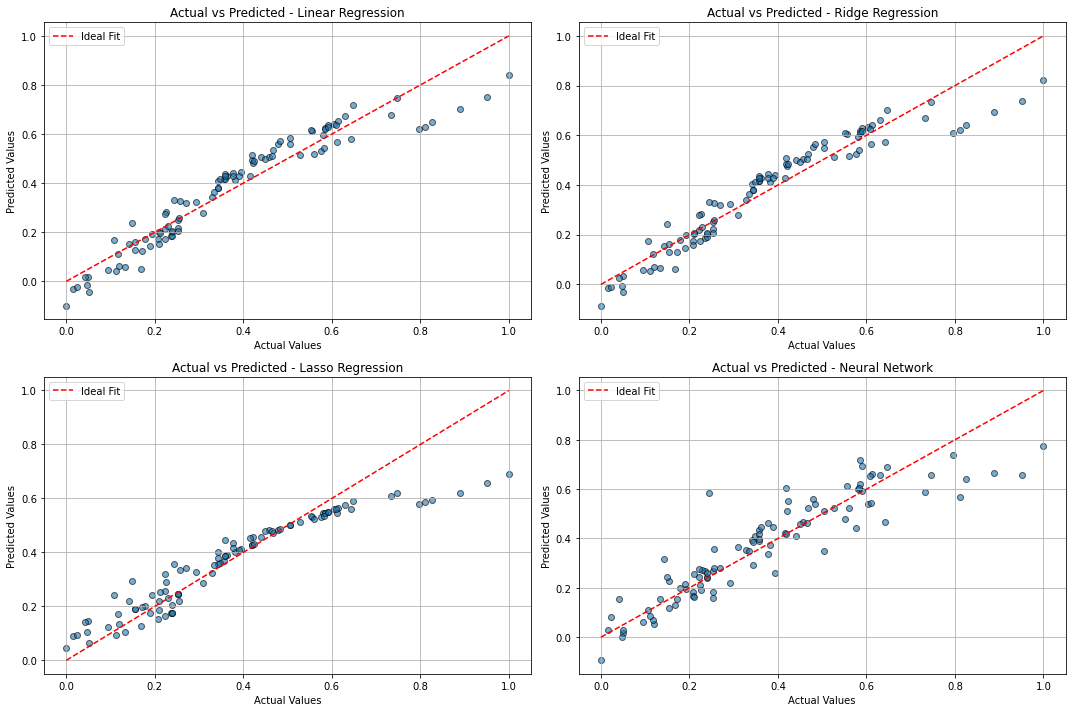

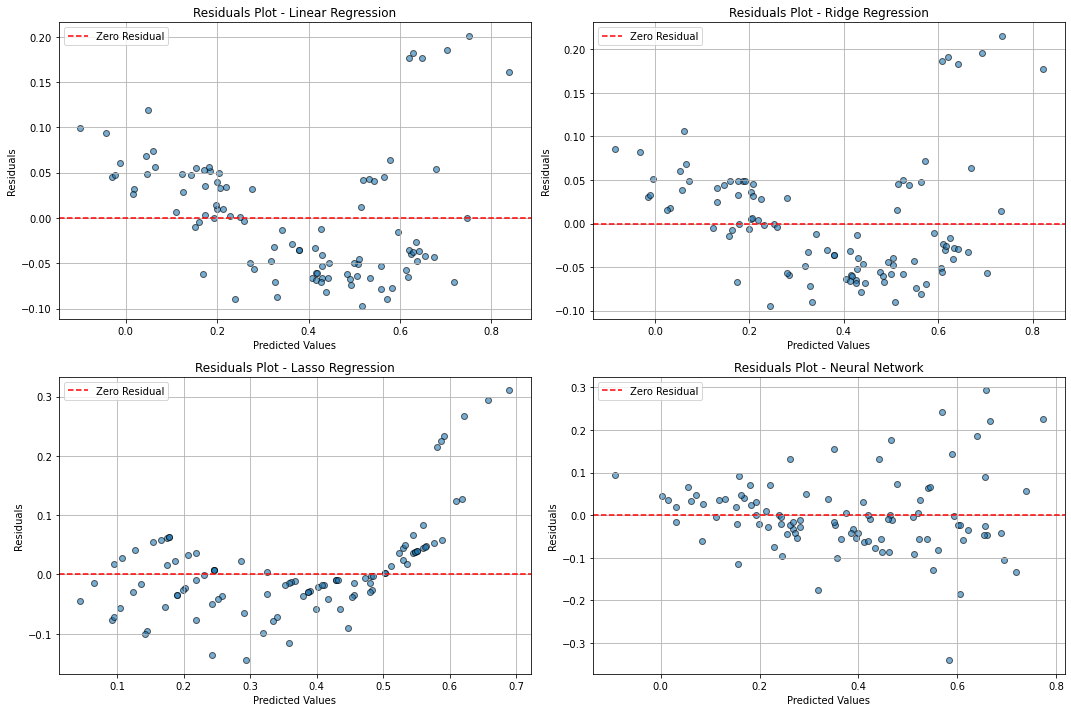

In [29]:


# Visualization of regression predictions vs actual values for all models
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), start=1):
    y_test_pred = model.predict(X_test)
    plt.subplot(2, 2, i)  # Arrange plots in a 2x2 grid
    plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.title(f"Actual vs Predicted - {name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Visualization of residuals for each model
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), start=1):
    y_test_pred = model.predict(X_test)
    residuals = y_test - y_test_pred 
    plt.subplot(2, 2, i)
    plt.scatter(y_test_pred, residuals, alpha=0.6, edgecolor='k')
    plt.axhline(0, color='r', linestyle='--', label="Zero Residual")
    plt.title(f"Residuals Plot - {name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


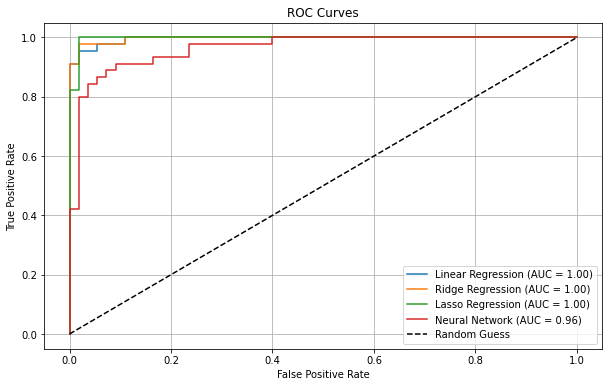

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
y_true = (y_test > y_test.mean()).astype(int)  # Convert regression target to binary for demonstration
roc_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    roc_results[name] = (fpr, tpr, auc)
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()


All models significantly outperform random guessing, indicating strong predictive performance in distinguishing between the target classes.

### Summary After Model Training:
- The regression models exhibit varying degrees of fit for the data, as seen in the actual vs. predicted plots and residual plots. 

- **Ridge Regression performs best**, with the lowest test MSE (0.004522) and RMSE (0.067244) and the highest test  𝑅^2(0.9064), indicating **strong predictive accuracy and minimal overfitting**. 

- **Linear Regression closely follows**, with comparable metrics (test 𝑅^2: 0.9037), suggesting it **generalizes well** to the data.

- **Lasso Regression** shows higher test errors (MSE: 0.006598, RMSE: 0.081228) and slightly lower R^2(0.8634), indicating **potential underfitting**. 

- **Neural Network** has the highest test errors (MSE: 0.008258, RMSE: 0.090873) and lowest test R^2(0.8290), showing **slight overfitting and reduced generalization**. 

- Residual plots for Ridge and Linear Regression display minimal scatter around zero, demonstrating strong fits, while Lasso and Neural Network residuals indicate less effective performance. Ridge Regression is the most suitable model for this dataset, balancing accuracy and generalization

## Part 3.2 Hyper Parameter Tuning and Model Evaluation

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [32]:
# Define parameter grid search - the set of parameter values to perform hyper parameter tuning
param_grids = {
    "Linear Regression": {},  # No hyperparameters for Linear Regression
    "Ridge Regression": {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]},
    "Lasso Regression": {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]},
    "Neural Network": {"hidden_layer_sizes": [(50,), (100,), (50, 50)],"activation": ["relu", "tanh"],"learning_rate_init": [0.001, 0.01],"alpha": [0.0001, 0.001, 0.01]
    }
}


In [33]:
grid_search_results = {}

# Perform Grid Search for each model, c = 5 for cross validation
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")
    grid_search = GridSearchCV(estimator=model,param_grid=param_grids[name],scoring=make_scorer(mean_squared_error, greater_is_better=False),cv=5,verbose=1 )
    grid_search.fit(X_train, y_train)  
    grid_search_results[name] = {  "Best Params": grid_search.best_params_,  "Best Score (MSE)": -grid_search.best_score_   }

Performing Grid Search for Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Performing Grid Search for Ridge Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Performing Grid Search for Lasso Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Performing Grid Search for Neural Network...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [34]:
grid_search_results_df = pd.DataFrame(grid_search_results).T
print(grid_search_results_df)


                                                         Best Params  \
Linear Regression                                                 {}   
Ridge Regression                                      {'alpha': 0.1}   
Lasso Regression                                    {'alpha': 0.001}   
Neural Network     {'activation': 'relu', 'alpha': 0.01, 'hidden_...   

                  Best Score (MSE)  
Linear Regression         0.005566  
Ridge Regression          0.005561  
Lasso Regression          0.005484  
Neural Network            0.004517  


In [35]:
 grid_search_results_df["Best Params"].loc["Neural Network"]

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (50, 50),
 'learning_rate_init': 0.01}

In [36]:
 grid_search_results_df

,Best Params,Best Score (MSE)
Linear Regression,{},0.005566
Ridge Regression,{'alpha': 0.1},0.005561
Lasso Regression,{'alpha': 0.001},0.005484
Neural Network,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.004517


### Summary after hyper parameter tuning:
- The MSE improved significantly from 0.006598 to 0.005484. This shows that tuning the alpha hyperparameter allowed Lasso Regression to better balance feature selection and error minimization.

- The Neural Network saw the most dramatic improvement, with MSE decreasing from 0.008258 to 0.004517. Tuning hyperparameters such as hidden_layer_sizes, activation, alpha, and learning_rate_init optimized the model to better fit the dataset, reducing both overfitting and underfitting.

In [37]:
models_tuned = {
    "Linear Regression": LinearRegression(), 
    "Ridge Regression": Ridge(alpha=1.0),  
    "Lasso Regression": Lasso(alpha=0.001),  # Adjusted alpha from grid search results
    "Neural Network": MLPRegressor(
        hidden_layer_sizes=(50, 50),  # Adjusted hidden layers
        activation='relu',           # Adjusted activation function
        alpha=0.01,                  # Adjusted regularization strength
        learning_rate_init=0.01,     # Adjusted learning rate
        max_iter=1000,             
    )
}

In [38]:
regression_results_tuned = {}

for name, model in models_tuned.items():

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculating metrics for testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    regression_results_tuned[name] = {
        "Train MSE": train_mse,
        "Train RMSE": train_rmse,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test RMSE": test_rmse,
        "Test R2": test_r2
    }

In [39]:
regression_results_tuned_df = pd.DataFrame(regression_results_tuned).T
regression_results_tuned_df

,Train MSE,Train RMSE,Train R2,Test MSE,Test RMSE,Test R2
Linear Regression,0.005013,0.070803,0.886863,0.004648,0.068177,0.903735
Ridge Regression,0.005051,0.071073,0.885998,0.004522,0.067244,0.906352
Lasso Regression,0.005213,0.072204,0.882343,0.004485,0.066968,0.907121
Neural Network,0.001803,0.042456,0.959320,0.005357,0.073190,0.889060


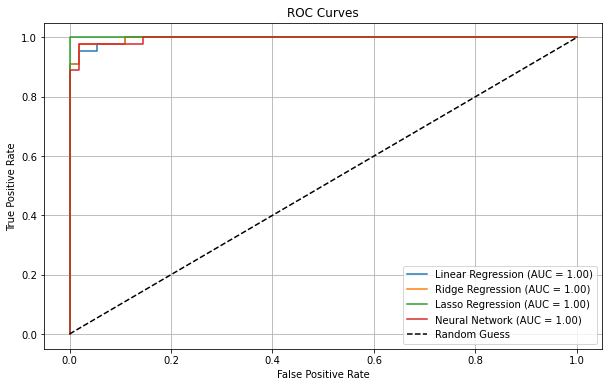

In [40]:
y_true = (y_test > y_test.mean()).astype(int)  # Convert regression target to binary for demonstration
roc_results = {}

for name, model in models_tuned.items():
    model.fit(X_train, y_train)
    y_scores = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    roc_results[name] = (fpr, tpr, auc)
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()

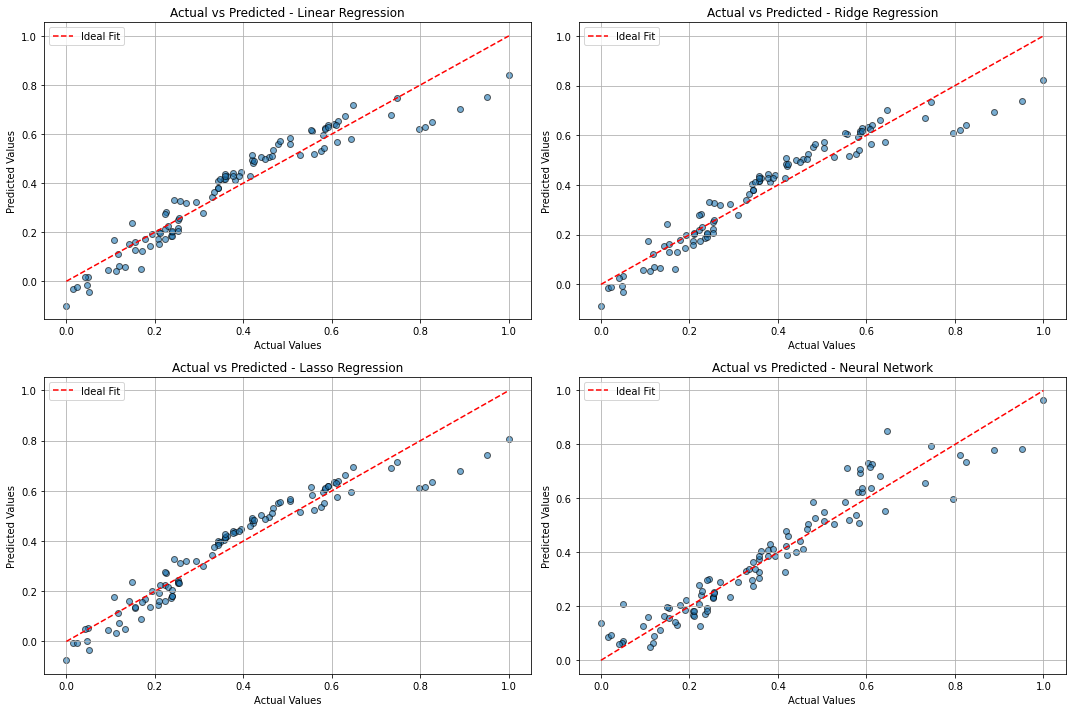

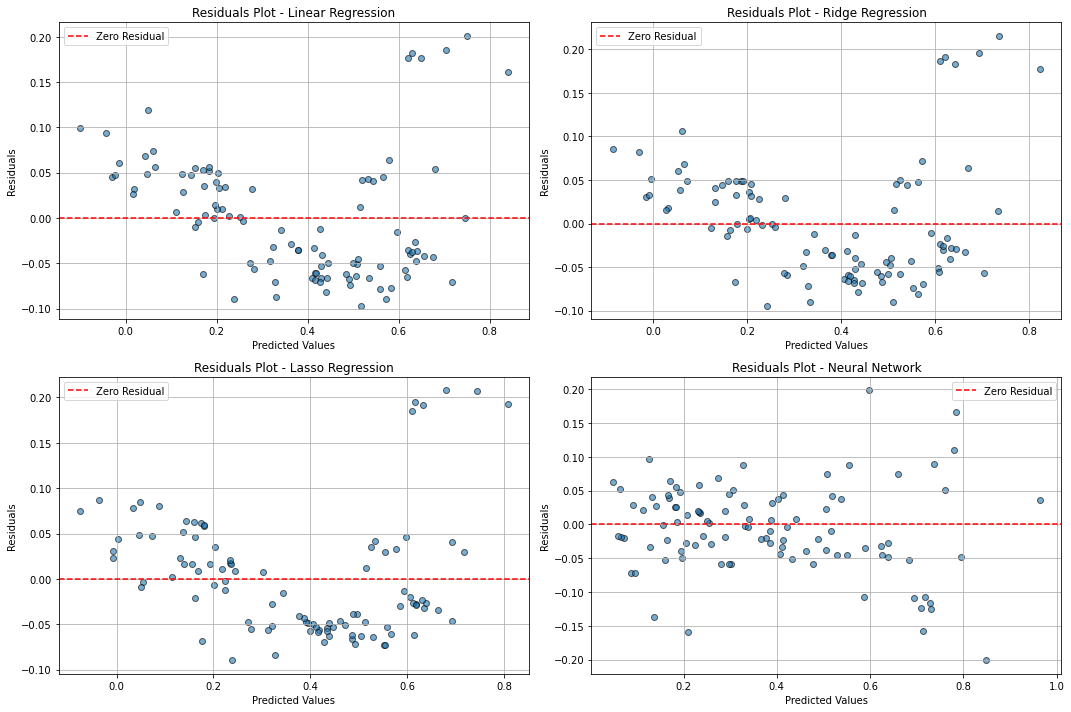

In [41]:
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models_tuned.items(), start=1):
    y_test_pred = model.predict(X_test)
    plt.subplot(2, 2, i)  # Arrange plots in a 2x2 grid
    plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
    plt.title(f"Actual vs Predicted - {name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Visualization of residuals for each model
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models_tuned.items(), start=1):
    y_test_pred = model.predict(X_test)
    residuals = y_test - y_test_pred 
    plt.subplot(2, 2, i)
    plt.scatter(y_test_pred, residuals, alpha=0.6, edgecolor='k')
    plt.axhline(0, color='r', linestyle='--', label="Zero Residual")
    plt.title(f"Residuals Plot - {name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Final pointers after tuing and training the models
- For best accuracy and generalization, choose the Neural Network.
- For interpretable results with strong generalization, use Lasso, Ridge or Linear regression.


### Part 3.3 Model interpreation using Linear Regression
I will use the Linear Regression model to interpret the relationships between the dependent and independent variables, as its metrics are very similar to those of Ridge and Lasso Regression.

In [42]:
linear_model = models_tuned["Linear Regression"]
linear_model.fit(X_train, y_train)
coefficients = linear_model.coef_

print("Feature Coefficients for Lasso Regression:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef:.3f}")

Feature Coefficients for Lasso Regression:
Feature: Age, Coefficient: 0.018
Feature: Gender, Coefficient: -0.002
Feature: Severity, Coefficient: -0.001
Feature: Consultation_History, Coefficient: 0.009
Feature: Stress_Level, Coefficient: 0.002
Feature: Sleep_Hours, Coefficient: -0.011
Feature: Work_Hours, Coefficient: 0.286
Feature: Physical_Activity_Hours, Coefficient: -0.629
Feature: Occupation_Engineering, Coefficient: 0.014
Feature: Occupation_Finance, Coefficient: -0.006
Feature: Occupation_Healthcare, Coefficient: 0.002
Feature: Occupation_IT, Coefficient: 0.018
Feature: Occupation_Other, Coefficient: 0.021
Feature: Occupation_Sales, Coefficient: 0.005
Feature: Country_Canada, Coefficient: 0.025
Feature: Country_Germany, Coefficient: 0.027
Feature: Country_India, Coefficient: 0.021
Feature: Country_Other, Coefficient: 0.037
Feature: Country_UK, Coefficient: 0.030
Feature: Country_USA, Coefficient: 0.026
Feature: Stress_Sleep_Ratio, Coefficient: -0.021
Feature: Mental_Health_Risk_

### Interpretation of Linear Model

- **Work Hours (0.286)**: A strong positive coefficient indicates that increasing work hours significantly worsens work-life balance, making it the most impactful predictor.

- **Country_Other (0.037), Country_UK (0.030), Country_Germany (0.027), and Country_USA (0.026)**: Individuals in these regions show slightly poorer work-life balance compared to the baseline.


- **Physical Activity Hours (-0.629)**: The strongest negative coefficient implies that increased physical activity hours greatly improve work-life balance by reducing its score.

- **Stress_Sleep_Ratio (-0.021)**: A slight negative coefficient suggests that managing stress relative to sleep slightly improves work-life balance.

- Features like **Age (0.018), Consultation_History (0.009), Mental_Health_Risk_Factor (0.010), and Occupation_IT (0.018)** show small coefficients, indicating a minor effect on work-life balance.

- Variables such as **Gender (-0.002), Severity (-0.001), and Sleep_Hours (-0.011)** have negligible influence.